In [1]:
from scipy.stats import binom, uniform, truncnorm, norm

import torch
from torch import nn
import numpy as np

torch.manual_seed(0)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


In [2]:
# https://github.com/ajbrock/BigGAN-PyTorch/blob/98459431a5d618d644d54cd1e9fceb1e5045648d/utils.py#L1086

In [3]:
device = 'cpu'

In [4]:
class Distribution(torch.Tensor):
  # Init the params of the distribution
  def init_distribution(self, dist_type, **kwargs):    
    self.dist_type = dist_type
    self.dist_kwargs = kwargs
    if self.dist_type == 'normal':
      self.mean, self.var = kwargs['mean'], kwargs['var']
    elif self.dist_type == 'categorical':
      self.num_categories = kwargs['num_categories']

  def sample_(self):
    if self.dist_type == 'normal':
      self.normal_(self.mean, self.var)
    elif self.dist_type == 'categorical':
      self.random_(0, self.num_categories)    
    # return self.variable
    
  # Silly hack: overwrite the to() method to wrap the new object
  # in a distribution as well
  def to(self, *args, **kwargs):
    new_obj = Distribution(self)
    new_obj.init_distribution(self.dist_type, **self.dist_kwargs)
    new_obj.data = super().to(*args, **kwargs)    
    return new_obj


In [5]:
dim_z = 512
fp16=False
z_var=1.0
G_batch_size = 1

z_ = Distribution(torch.randn(G_batch_size, dim_z, requires_grad=False))
z_.init_distribution('normal', mean=0, var=z_var)
z_ = z_.to(device,torch.float16 if fp16 else torch.float32)   

if fp16:
    z_ = z_.half()

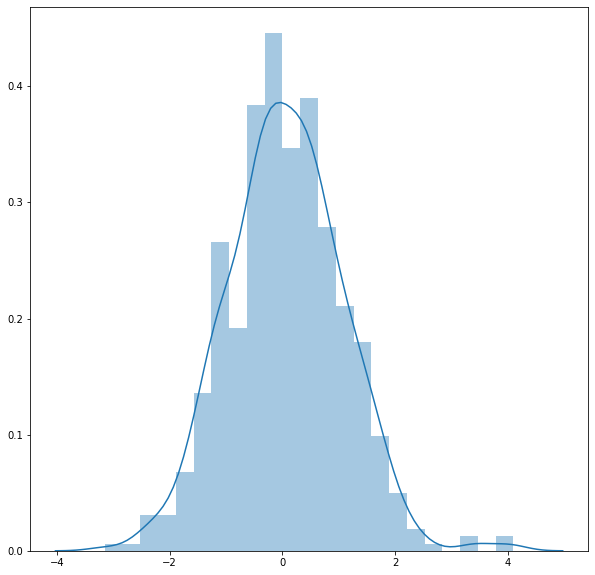

In [6]:
plt.figure(figsize=(10, 10))
sns.distplot(z_.data.numpy())

# Truncation

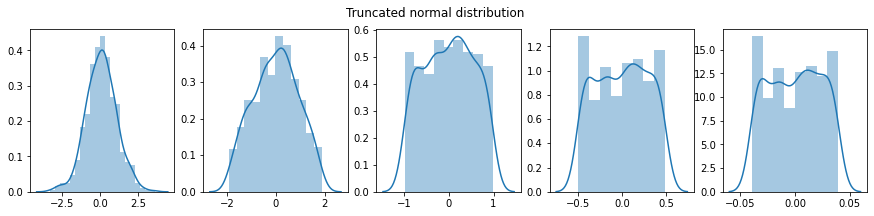

In [7]:
n_samples = 512

plt.figure(figsize=(15, 3))
plt.subplot(151)
values = norm.rvs(size=n_samples)
sns.distplot(values)
plt.subplot(152)
values = truncnorm.rvs(-2, 2, size=n_samples, random_state=42)
sns.distplot(values)
plt.subplot(153)
values = truncnorm.rvs(-1, 1, size=n_samples, random_state=42)
sns.distplot(values)
plt.subplot(154)
values = truncnorm.rvs(-0.5, 0.5, size=n_samples, random_state=42)
sns.distplot(values)
plt.subplot(155)
values = truncnorm.rvs(-0.04, 0.04, size=n_samples, random_state=42)
sns.distplot(values)
plt.suptitle('Truncated normal distribution')
plt.show()